![Scikit-Learn logo](img/scikit-learn-logo.png)

# <b>Introduction</b>

 
***

This notebooks purpose is to provide a clear and concise overview of the scikit-learn Python library as well as demonstrations of at least three interesting scikit-learn algorithms. Namely the (blank), (blank) and (blank) algorithms. These algorithms will also be accompanied by appropriate plots and other visualisations. 

In accordance with [GMIT's plagarism policy](https://www.gmit.ie/sites/default/files/public/general/docs/policy-plagiarism-2019.pdf), all work compiled in this notebook is owned by the author and the creators of the respective algorithms. All sources and aids used have been indicated as such. All texts either quoted directly or paraphrased have been indicated by in-text citations.

## Overview - What is Scikit-Learn?
***

Scikit-learn provides a range of supervised and unsupervised learning algorithms via a consistent interface in Python[[1]](#references). It is built upon the SciPy library which means it includes many recognisable Python libraries which are included in the SciPy library such as:
* <b>NumPy</b>: Base n-dimensional array package
* <b>SciPy</b>: Fundamental library for scientific computing
* <b>Matplotlib</b>: Comprehensive 2D/3D plotting
* <b>IPython</b>: Enhanced interactive console
* <b>Sympy</b>: Symbolic mathematics
* <b>Pandas</b>: Data structures and analysis


The library is focused on modeling data. It is not focused on loading, manipulating and summarizing data. it is described on the offical SciKit page as[[2]](#references): 

    "Simple and efficient tools for predictive data analysis
    Accessible to everybody, and reusable in various contexts
    Built on NumPy, SciPy, and matplotlib
    Open source, commercially usable - BSD license"
    




# <b>Interesting Algorithms</b>
***

## **Linear Regression** - Predicting the stock price of Netflix 

Dataset taken from: **[here](https://finance.yahoo.com/quote/nflx/history/?guccounter=1&guce_referrer=aHR0cHM6Ly93d3cuZ29vZ2xlLmNvbS8&guce_referrer_sig=AQAAAFA2PMvQkzsotUIvyr7kLpidRReghKPM7ESGIrULUHoqhfacsISd_Q6LHVzqr67qD9_I5GikFwmZbC1QD3ZMcPQha7cUjLHwpxDw2hovGySgU9BDUtMutRnSEef3YigFbelaMh4bDGXRHKhxFXxiO6z5mhBGEr9xl-odHuH9H1yW)**

Here, a machine learning linear regression model will be created that takes information from the past Netflix stock prices and returns a prediction of the stock price for the next day.

### **Setup**
***

In [1]:
# Numerical arrays.
import numpy as np

# Data frames.
import pandas as pd

# Plotting.
import matplotlib.pyplot as plt

# Linear regression.
from sklearn.linear_model import LinearRegression

# Helper functions.
import sklearn.model_selection as mod

# Scikit Learn test train split import.
from sklearn.model_selection import train_test_split

# Fancier, statistical plots.
import seaborn as sns

***

### **Reading in the Data**

In [2]:
# Load local .csv file as DataFrame
Df = pd.read_csv('NFLX.csv')

In [3]:
# Better look at the data
Df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,558.536229,565.129443,551.567778,558.217697,558.217697,3.914540e+06
std,56.318164,56.970818,55.124724,56.002362,56.002362,2.829994e+06
min,479.750000,488.570007,478.540009,484.980011,484.980011,1.287200e+06
25%,512.589996,517.959991,505.549987,512.345016,512.345016,2.597000e+06
50%,544.204987,551.684998,538.100006,543.330017,543.330017,3.241950e+06
75%,598.277496,609.442505,593.717484,599.827500,599.827500,4.326000e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,3.263750e+07


***
### <b>Visualise the Data</b>

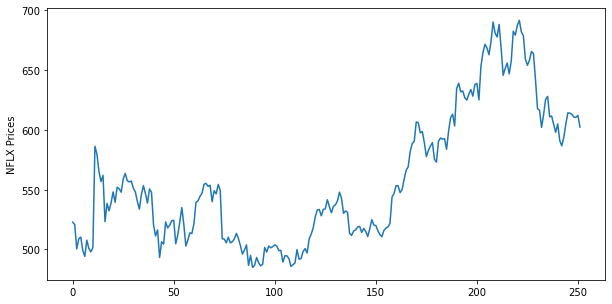

In [4]:
# Only keep close columns 
Df=Df[['Close']] 
# Drop rows with missing values 
Df= Df.dropna() 
# Plot the closing price of GLD 
Df.Close.plot(figsize=(10,5)) 
plt.ylabel("NFLX Prices")
plt.show()

***
### **Define explanatory variables**

In [5]:
Df['S_3'] = Df['Close'].shift(1).rolling(window=3).mean() 
Df['S_9']= Df['Close'].shift(1).rolling(window=9).mean() 
Df= Df.dropna() 
X = Df[['S_3','S_9']] 
X.head()

,S_3,S_9
9,500.966665,507.271108
10,502.210002,504.506666
11,500.203328,502.392222
12,528.696676,511.931115
13,555.983348,519.814450


***
### **Define dependent variable**

In [6]:
y = Df['Close']
y.head()

9     497.980011
10    501.769989
11    586.340027
12    579.840027
13    565.169983
Name: Close, dtype: float64

***
### **Split the data into train and test dataset**
<ol>
    <li>First 80% of the data is used for training and remaining data for testing
    <li>X_train & y_train are training dataset
    <li>X_test & y_test are test dataset
</ol>

In [7]:
t=.8 
t = int(t*len(Df)) 
# Train dataset 
X_train = X[:t] 
y_train = y[:t]  
# Test dataset 
X_test = X[t:] 
y_test = y[t:]

***
### **Create a linear regression model**

If a mathematical relationship between the ‘x’ and ‘y’ variables which best explains the observed values of ‘y’ in terms of observed values of ‘x’ by fitting a line through a scatter plot then such an equation between x and y is called linear regression analysis.

$Y = m1 * X1 + m2 * X2 + C NFLX price = m1 * 3 days moving average + m2 * 15 days moving average + c$

In [8]:
linear = LinearRegression().fit(X_train,y_train)

***
### **Predicting the NFLX prices**

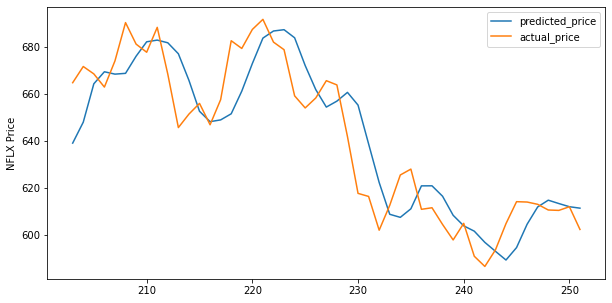

In [9]:
predicted_price = linear.predict(X_test)  
predicted_price = pd.DataFrame(predicted_price,index=y_test.index,columns = ['price'])  
predicted_price.plot(figsize=(10,5))  
y_test.plot()  
plt.legend(['predicted_price','actual_price'])  
plt.ylabel("NFLX Price")  
plt.show()


***
### **Checking our Accuracy**

In [10]:
r2_score = linear.score(X[t:],y[t:])*100  
float("{0:.2f}".format(r2_score))


78.85

The outputting prediction value is **78.85%** which isn't amazing. R-squared is always between 0 and 100%. A score close to 100% indicates that the model explains the NFLX prices well. This particular model does a mediocre job of predicting the next stock price.
***

## **Classification Algorithms** - Heart Disease Prediction

Dataset taken from: **[here](https://www.kaggle.com/ronitf/heart-disease-uci)**

Here, we will 6 different machine learning models to predict the accuracy of heart disease in the Cleveland heart disease statistics data set. A comparison will be made to show which model has the highest accuracy rating.


### **Setup**
***

In [11]:
# Import the RandomForestClassifier model
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix, classification_report

***

### **Reading in the Data**

In [12]:
# Load local .csv file as DataFrame
heart = pd.read_csv('heart.csv')

In [13]:
# Better look at the data
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


***
### <b>Visualise the Data</b>

In [14]:
# Show how many people actually had heart disease and how many didn't
heart["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

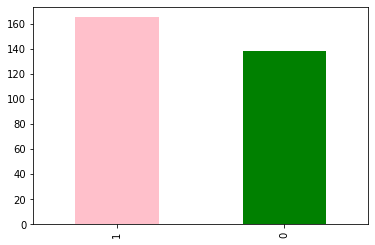

In [15]:
# Visualise the data on a Graph -- 1 = had heart disease, 0 = hadn't heart disease
heart["target"].value_counts().plot(kind = "bar", color = ["pink", "green"]);

### Heart Disease frequency based on Gender

In [16]:
heart.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [17]:
# Compare target column with sex column
pd.crosstab(heart.target, heart.sex)

sex,0,1
target,,
0,24,114
1,72,93


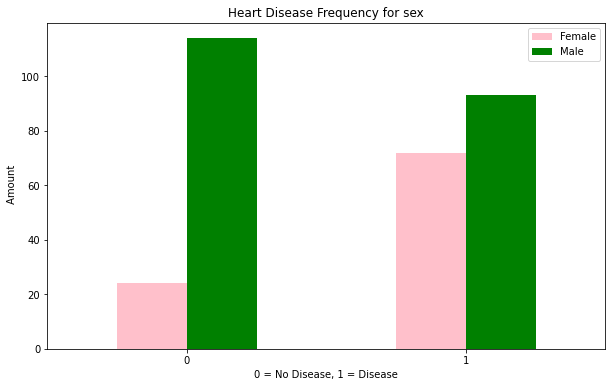

In [18]:
# Create a plot of crosstab
pd.crosstab(heart.target, heart.sex).plot(kind = "bar",figsize=(10, 6), color = ["pink", "green"] )
plt.title("Heart Disease Frequency for sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel(" Amount")

plt.legend(["Female", "Male"])

plt.xticks(rotation = 0);

### Age vs. Max Heart Rate for Heart Disease

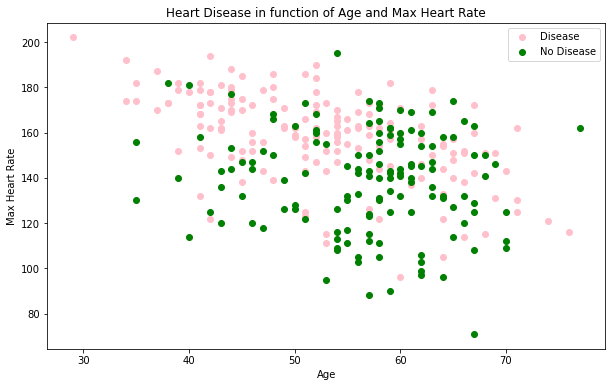

In [19]:
# Create another figure 
plt.figure(figsize=(10, 6))

# Scatter with positive example 
plt.scatter(heart.age[heart.target == 1], heart.thalach[heart.target ==1],
           c = "pink")

# Scatter with negative example 

plt.scatter(heart.age[heart.target == 0], heart.thalach[heart.target==0],
           c = "green")

# Add some helpful info
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

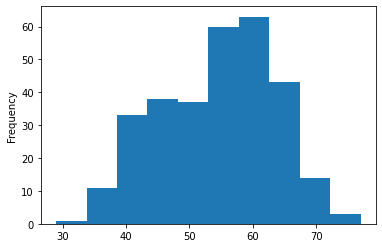

In [20]:
# Check the distribution of the age column with a histgram
heart.age.plot.hist();

***
### **Splitting the data into test and train splits**

In [21]:
heart.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [22]:
# split the data into x and y
X = heart.drop("target", axis = 1)
y = heart["target"]

In [23]:
# X comprises of everything but the target 
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [24]:
# y comprises of just the target
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [25]:
# Split data into train and test sets
np.random.seed(42)

# Split into train & test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

***

### **Creating the models**

In [26]:
# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

In [27]:
# Assigning and naming the different algorithms
models = {"Logistic Regression": LogisticRegression(solver="liblinear"),
          "SVC": SVC(),
          "Naive Bayes":GaussianNB(),
          "KNN": KNeighborsClassifier(),
          "Decision Tree Classifier":DecisionTreeClassifier(),
          "Random Forest": RandomForestClassifier()}

In [28]:
# Adding the scores to a new array
model_scores = {}

for name, model in models.items():
    
    model.fit(X_train, y_train)
    # Evaluate the model and append its score to model_scores
    model_scores[name] = model.score(X_test, y_test)

In [29]:
# Display the scores under a new row "Accuracy"
evaluation = pd.DataFrame(model_scores, index=["Accuracy"])
evaluation

,Logistic Regression,SVC,Naive Bayes,KNN,Decision Tree Classifier,Random Forest
Accuracy,0.868852,0.704918,0.868852,0.688525,0.819672,0.852459


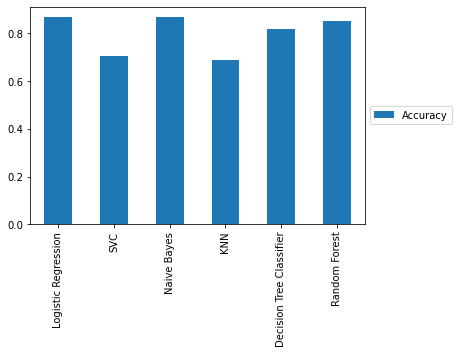

In [30]:
# Lets plot it
evaluation.T.plot.bar()
# Put a legend to the right of the current axis
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

From the bar chart, we can determine the accuracy to predict heart disease from the inputting data is high, however the **Logistic Regression, Naive Bayes** and **Random Forest** models output the highest accuracy with a **86.8852%, 86.8852%** and **85.2459%** respectively.
***

# References
***

<b>[1]</b> Brownlee, J., 2021. A Gentle Introduction to Scikit-Learn. [online] Machine Learning Mastery. 

Available at: <https://machinelearningmastery.com/a-gentle-introduction-to-scikit-learn-a-python-machine-learning-library/> [Accessed 19 November 2021].


<b>[2]</b>Scikit-learn.org. 2021. scikit-learn: machine learning in Python — scikit-learn 1.0.1 documentation. [online] 

Available at: <https://scikit-learn.org/stable/index.html> [Accessed 4 December 2021].

**[3]** Malik, U., 2022. Implementing SVM and Kernel SVM with Python's Scikit-Learn. [online] Stack Abuse. 

Available at: <https://stackabuse.com/implementing-svm-and-kernel-svm-with-pythons-scikit-learn/> [Accessed 2 January 2022].

**[4]** Kumar, R., 2022. Using Linear Regression To Predict AAPL (Apple stock) Prices In Python. [online] Medium. 

Available at: <https://medium.com/analytics-vidhya/using-linear-regression-to-predict-aapl-apple-stock-prices-in-python-1a629fbea15b> [Accessed 2 January 2022].

**[5]** West, Z., 2022. Predicting Stock Prices with Linear Regression in Python - αlphαrithms. [online] αlphαrithms. 

Available at: <https://www.alpharithms.com/predicting-stock-prices-with-linear-regression-214618/> [Accessed 2 January 2022].

**[6]** Shukla, A., 2022. heart-disease-prediction. [online] Kaggle.com. 

Available at: <https://www.kaggle.com/akshukla283/heart-disease-prediction> [Accessed 2 January 2022].


# Resources
***